In [1]:
import pandas as pd
import nltk

In [2]:
df = pd.read_csv('fashion.csv')
df.head(),df.shape

(   year   season            brand  author of review  location  \
 0   2016  Spring        A Dtacher  Kristin Anderson  NEW YORK   
 1   2016  Spring  A.F. Vandevorst       Luke Leitch     PARIS   
 2   2016  Spring           A.L.C.  Kristin Anderson  NEW YORK   
 3   2016  Spring           A.P.C.     Nicole Phelps     PARIS   
 4   2016  Spring       A.W.A.K.E.       Maya Singer  NEW YORK   
 
                   time                                        review text  
 0   September 13, 2015  Detachment was the word of the day at A Dtache...  
 1      October 1, 2015  You heard this collection coming long before y...  
 2   September 21, 2015  August saw the announcement of big news for A....  
 3      October 3, 2015  They call me the king of basics, Jean Touitou ...  
 4     October 21, 2015  Natalia Alaverdian is a designer with a lot of...  ,
 (434, 7))

In [3]:
#columns in the table 
df.columns

Index(['year ', 'season', 'brand', 'author of review', 'location', 'time',
       'review text'],
      dtype='object')

In [4]:
# extracting the review we are going to analyze
reviews = df['review text']


In [5]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from textblob import TextBlob

## Method 1: Counting the pos and neg words in the reviews

In [6]:
#filtering null
def IsNotNull(value):
    return value is not None and len(value) > 0

In [7]:
# create dictionary list (prositive)
dict_p = []
f = open('positive-words.txt', 'r')   
for line in f:
   t = line.strip().lower()
   if (IsNotNull(t)):
      dict_p.append(t)
f.close()

In [8]:
dict_p[:4]

['a+', 'abound', 'abounds', 'abundance']

In [9]:
# create dictionary list (negative)
dict_n = []
f = open('negative-words.txt', 'r',encoding="ISO-8859-1")   
for line in f:
   t = line.strip().lower()
   if (IsNotNull(t)):
      dict_n.append(t)
f.close()

In [10]:
dict_n[:4]

['2-faced', '2-faces', 'abnormal', 'abolish']

In [11]:
# count of positive and negative words that appeared in each message
# net count which is calculated by positive count subtracting negative count. 

poscnt = []
negcnt = []
netcnt = []

for n in reviews:
    
    text = n.lower()
    qa = 0
    qb = 0

    for word in dict_p :
        if (word in text) :
            qa = qa + 1

    for word in dict_n :
        if (word in text) :
            qb = qb + 1

    qc = qa - qb
    
    poscnt.append(qa)
    negcnt.append(qb)
    netcnt.append(qc)


In [12]:
df['positive_1'] = poscnt
df['negative_1'] = negcnt
df['neutral_1'] = netcnt

In [13]:
df.head()

,year,season,brand,author of review,location,time,review text,positive_1,negative_1,neutral_1
0,2016,Spring,A Dtacher,Kristin Anderson,NEW YORK,"September 13, 2015",Detachment was the word of the day at A Dtache...,16,12,4
1,2016,Spring,A.F. Vandevorst,Luke Leitch,PARIS,"October 1, 2015",You heard this collection coming long before y...,14,18,-4
2,2016,Spring,A.L.C.,Kristin Anderson,NEW YORK,"September 21, 2015",August saw the announcement of big news for A....,22,25,-3
3,2016,Spring,A.P.C.,Nicole Phelps,PARIS,"October 3, 2015","They call me the king of basics, Jean Touitou ...",11,26,-15
4,2016,Spring,A.W.A.K.E.,Maya Singer,NEW YORK,"October 21, 2015",Natalia Alaverdian is a designer with a lot of...,14,20,-6


In [14]:
## Method two： SentimentIntensityAnalyzer from NLTK

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer #Vader 
review_sent = []
sid = SentimentIntensityAnalyzer()
for sentence in reviews:
    ss = sid.polarity_scores(sentence)
    print(ss)
    review_sent.append(ss)

{'neg': 0.012, 'neu': 0.883, 'pos': 0.105, 'compound': 0.9625}
{'neg': 0.052, 'neu': 0.889, 'pos': 0.059, 'compound': 0.4378}
{'neg': 0.006, 'neu': 0.872, 'pos': 0.122, 'compound': 0.9842}
{'neg': 0.054, 'neu': 0.846, 'pos': 0.1, 'compound': 0.9373}
{'neg': 0.017, 'neu': 0.866, 'pos': 0.116, 'compound': 0.9738}
{'neg': 0.031, 'neu': 0.797, 'pos': 0.173, 'compound': 0.9834}
{'neg': 0.025, 'neu': 0.855, 'pos': 0.12, 'compound': 0.987}
{'neg': 0.011, 'neu': 0.839, 'pos': 0.15, 'compound': 0.9862}
{'neg': 0.039, 'neu': 0.867, 'pos': 0.094, 'compound': 0.9602}
{'neg': 0.015, 'neu': 0.919, 'pos': 0.066, 'compound': 0.9325}
{'neg': 0.014, 'neu': 0.902, 'pos': 0.084, 'compound': 0.9013}
{'neg': 0.039, 'neu': 0.882, 'pos': 0.079, 'compound': 0.8723}
{'neg': 0.01, 'neu': 0.884, 'pos': 0.106, 'compound': 0.9649}
{'neg': 0.006, 'neu': 0.894, 'pos': 0.1, 'compound': 0.9796}
{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.9801}
{'neg': 0.02, 'neu': 0.746, 'pos': 0.234, 'compound': 0.9965}
{'n

{'neg': 0.033, 'neu': 0.912, 'pos': 0.055, 'compound': 0.9418}
{'neg': 0.005, 'neu': 0.892, 'pos': 0.103, 'compound': 0.9749}
{'neg': 0.045, 'neu': 0.876, 'pos': 0.078, 'compound': 0.8778}
{'neg': 0.009, 'neu': 0.876, 'pos': 0.116, 'compound': 0.9753}
{'neg': 0.008, 'neu': 0.883, 'pos': 0.109, 'compound': 0.9753}
{'neg': 0.089, 'neu': 0.792, 'pos': 0.119, 'compound': 0.8985}
{'neg': 0.024, 'neu': 0.904, 'pos': 0.071, 'compound': 0.9332}
{'neg': 0.007, 'neu': 0.826, 'pos': 0.167, 'compound': 0.9948}
{'neg': 0.028, 'neu': 0.78, 'pos': 0.191, 'compound': 0.9904}
{'neg': 0.046, 'neu': 0.908, 'pos': 0.046, 'compound': 0.0636}
{'neg': 0.049, 'neu': 0.92, 'pos': 0.031, 'compound': -0.5423}
{'neg': 0.057, 'neu': 0.818, 'pos': 0.125, 'compound': 0.9521}
{'neg': 0.01, 'neu': 0.909, 'pos': 0.081, 'compound': 0.9178}
{'neg': 0.01, 'neu': 0.797, 'pos': 0.192, 'compound': 0.9933}
{'neg': 0.052, 'neu': 0.879, 'pos': 0.069, 'compound': 0.4717}
{'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'compound': 0.961

{'neg': 0.016, 'neu': 0.88, 'pos': 0.104, 'compound': 0.9848}
{'neg': 0.016, 'neu': 0.908, 'pos': 0.076, 'compound': 0.8979}
{'neg': 0.02, 'neu': 0.867, 'pos': 0.113, 'compound': 0.9632}
{'neg': 0.037, 'neu': 0.864, 'pos': 0.099, 'compound': 0.9557}
{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.9967}
{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.9923}
{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.9253}
{'neg': 0.019, 'neu': 0.857, 'pos': 0.124, 'compound': 0.9741}
{'neg': 0.071, 'neu': 0.842, 'pos': 0.087, 'compound': 0.2904}
{'neg': 0.036, 'neu': 0.878, 'pos': 0.087, 'compound': 0.9166}
{'neg': 0.027, 'neu': 0.893, 'pos': 0.08, 'compound': 0.9744}
{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.9828}
{'neg': 0.013, 'neu': 0.866, 'pos': 0.12, 'compound': 0.984}
{'neg': 0.017, 'neu': 0.833, 'pos': 0.149, 'compound': 0.981}
{'neg': 0.013, 'neu': 0.823, 'pos': 0.164, 'compound': 0.9822}
{'neg': 0.025, 'neu': 0.806, 'pos': 0.168, 'compound': 0.9922}
{'neg'

In [16]:
df2 = pd.DataFrame(data=review_sent)
df2.columns

Index(['compound', 'neg', 'neu', 'pos'], dtype='object')

In [17]:
df['positive_2'] = df2['pos']
df['negative_2'] = df2['neg']
df['neutral_2'] = df2['neu']
df['compound'] = df2['compound']

In [18]:
df.head()

,year,season,brand,author of review,location,time,review text,positive_1,negative_1,neutral_1,positive_2,negative_2,neutral_2,compound
0,2016,Spring,A Dtacher,Kristin Anderson,NEW YORK,"September 13, 2015",Detachment was the word of the day at A Dtache...,16,12,4,0.105,0.012,0.883,0.9625
1,2016,Spring,A.F. Vandevorst,Luke Leitch,PARIS,"October 1, 2015",You heard this collection coming long before y...,14,18,-4,0.059,0.052,0.889,0.4378
2,2016,Spring,A.L.C.,Kristin Anderson,NEW YORK,"September 21, 2015",August saw the announcement of big news for A....,22,25,-3,0.122,0.006,0.872,0.9842
3,2016,Spring,A.P.C.,Nicole Phelps,PARIS,"October 3, 2015","They call me the king of basics, Jean Touitou ...",11,26,-15,0.100,0.054,0.846,0.9373
4,2016,Spring,A.W.A.K.E.,Maya Singer,NEW YORK,"October 21, 2015",Natalia Alaverdian is a designer with a lot of...,14,20,-6,0.116,0.017,0.866,0.9738


## Method 3 : Textblob 

In [19]:
sent_score = []
for i in reviews:
    blob = TextBlob(i)
    #print(blob.sentiment)
    sent_score.append(blob.sentiment)

In [20]:
df3 = pd.DataFrame(data=sent_score)
df3.head()

,polarity,subjectivity
0,0.176518,0.506270
1,0.134861,0.473283
2,0.178247,0.466122
3,0.068447,0.383085
4,0.249673,0.593464


In [21]:
df['polarity'] = df3['polarity']
df['subjectivity'] = df3['subjectivity']

In [22]:
df.head()



,year,season,brand,author of review,location,time,review text,positive_1,negative_1,neutral_1,positive_2,negative_2,neutral_2,compound,polarity,subjectivity
0,2016,Spring,A Dtacher,Kristin Anderson,NEW YORK,"September 13, 2015",Detachment was the word of the day at A Dtache...,16,12,4,0.105,0.012,0.883,0.9625,0.176518,0.506270
1,2016,Spring,A.F. Vandevorst,Luke Leitch,PARIS,"October 1, 2015",You heard this collection coming long before y...,14,18,-4,0.059,0.052,0.889,0.4378,0.134861,0.473283
2,2016,Spring,A.L.C.,Kristin Anderson,NEW YORK,"September 21, 2015",August saw the announcement of big news for A....,22,25,-3,0.122,0.006,0.872,0.9842,0.178247,0.466122
3,2016,Spring,A.P.C.,Nicole Phelps,PARIS,"October 3, 2015","They call me the king of basics, Jean Touitou ...",11,26,-15,0.100,0.054,0.846,0.9373,0.068447,0.383085
4,2016,Spring,A.W.A.K.E.,Maya Singer,NEW YORK,"October 21, 2015",Natalia Alaverdian is a designer with a lot of...,14,20,-6,0.116,0.017,0.866,0.9738,0.249673,0.593464


## Analyzing Part

In [23]:
# Converting the time into datetime format for further analyze
df.time = df['time'].astype('datetime64[ns]')
df.head()

,year,season,brand,author of review,location,time,review text,positive_1,negative_1,neutral_1,positive_2,negative_2,neutral_2,compound,polarity,subjectivity
0,2016,Spring,A Dtacher,Kristin Anderson,NEW YORK,2015-09-13,Detachment was the word of the day at A Dtache...,16,12,4,0.105,0.012,0.883,0.9625,0.176518,0.506270
1,2016,Spring,A.F. Vandevorst,Luke Leitch,PARIS,2015-10-01,You heard this collection coming long before y...,14,18,-4,0.059,0.052,0.889,0.4378,0.134861,0.473283
2,2016,Spring,A.L.C.,Kristin Anderson,NEW YORK,2015-09-21,August saw the announcement of big news for A....,22,25,-3,0.122,0.006,0.872,0.9842,0.178247,0.466122
3,2016,Spring,A.P.C.,Nicole Phelps,PARIS,2015-10-03,"They call me the king of basics, Jean Touitou ...",11,26,-15,0.100,0.054,0.846,0.9373,0.068447,0.383085
4,2016,Spring,A.W.A.K.E.,Maya Singer,NEW YORK,2015-10-21,Natalia Alaverdian is a designer with a lot of...,14,20,-6,0.116,0.017,0.866,0.9738,0.249673,0.593464


In [24]:
set(list(df['year '])),set(list(df['season'])) # Droppping this useless info

({2016}, {'Spring'})

In [25]:
df = df.drop('season',axis =1) 

In [26]:
df = df.drop('year ',axis =1)

In [27]:
df.head()

,brand,author of review,location,time,review text,positive_1,negative_1,neutral_1,positive_2,negative_2,neutral_2,compound,polarity,subjectivity
0,A Dtacher,Kristin Anderson,NEW YORK,2015-09-13,Detachment was the word of the day at A Dtache...,16,12,4,0.105,0.012,0.883,0.9625,0.176518,0.506270
1,A.F. Vandevorst,Luke Leitch,PARIS,2015-10-01,You heard this collection coming long before y...,14,18,-4,0.059,0.052,0.889,0.4378,0.134861,0.473283
2,A.L.C.,Kristin Anderson,NEW YORK,2015-09-21,August saw the announcement of big news for A....,22,25,-3,0.122,0.006,0.872,0.9842,0.178247,0.466122
3,A.P.C.,Nicole Phelps,PARIS,2015-10-03,"They call me the king of basics, Jean Touitou ...",11,26,-15,0.100,0.054,0.846,0.9373,0.068447,0.383085
4,A.W.A.K.E.,Maya Singer,NEW YORK,2015-10-21,Natalia Alaverdian is a designer with a lot of...,14,20,-6,0.116,0.017,0.866,0.9738,0.249673,0.593464


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style('ticks')
sent_by_location = df.groupby(['location']).mean()
plt.figure(figsize=(10,6),dpi = 300)
sns.set(font_scale=1.5)
_ = sns.barplot(data= df,x = 'location',y = 'polarity')
_.figure.savefig('polarity_by_location.png')

/Users/marcowang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


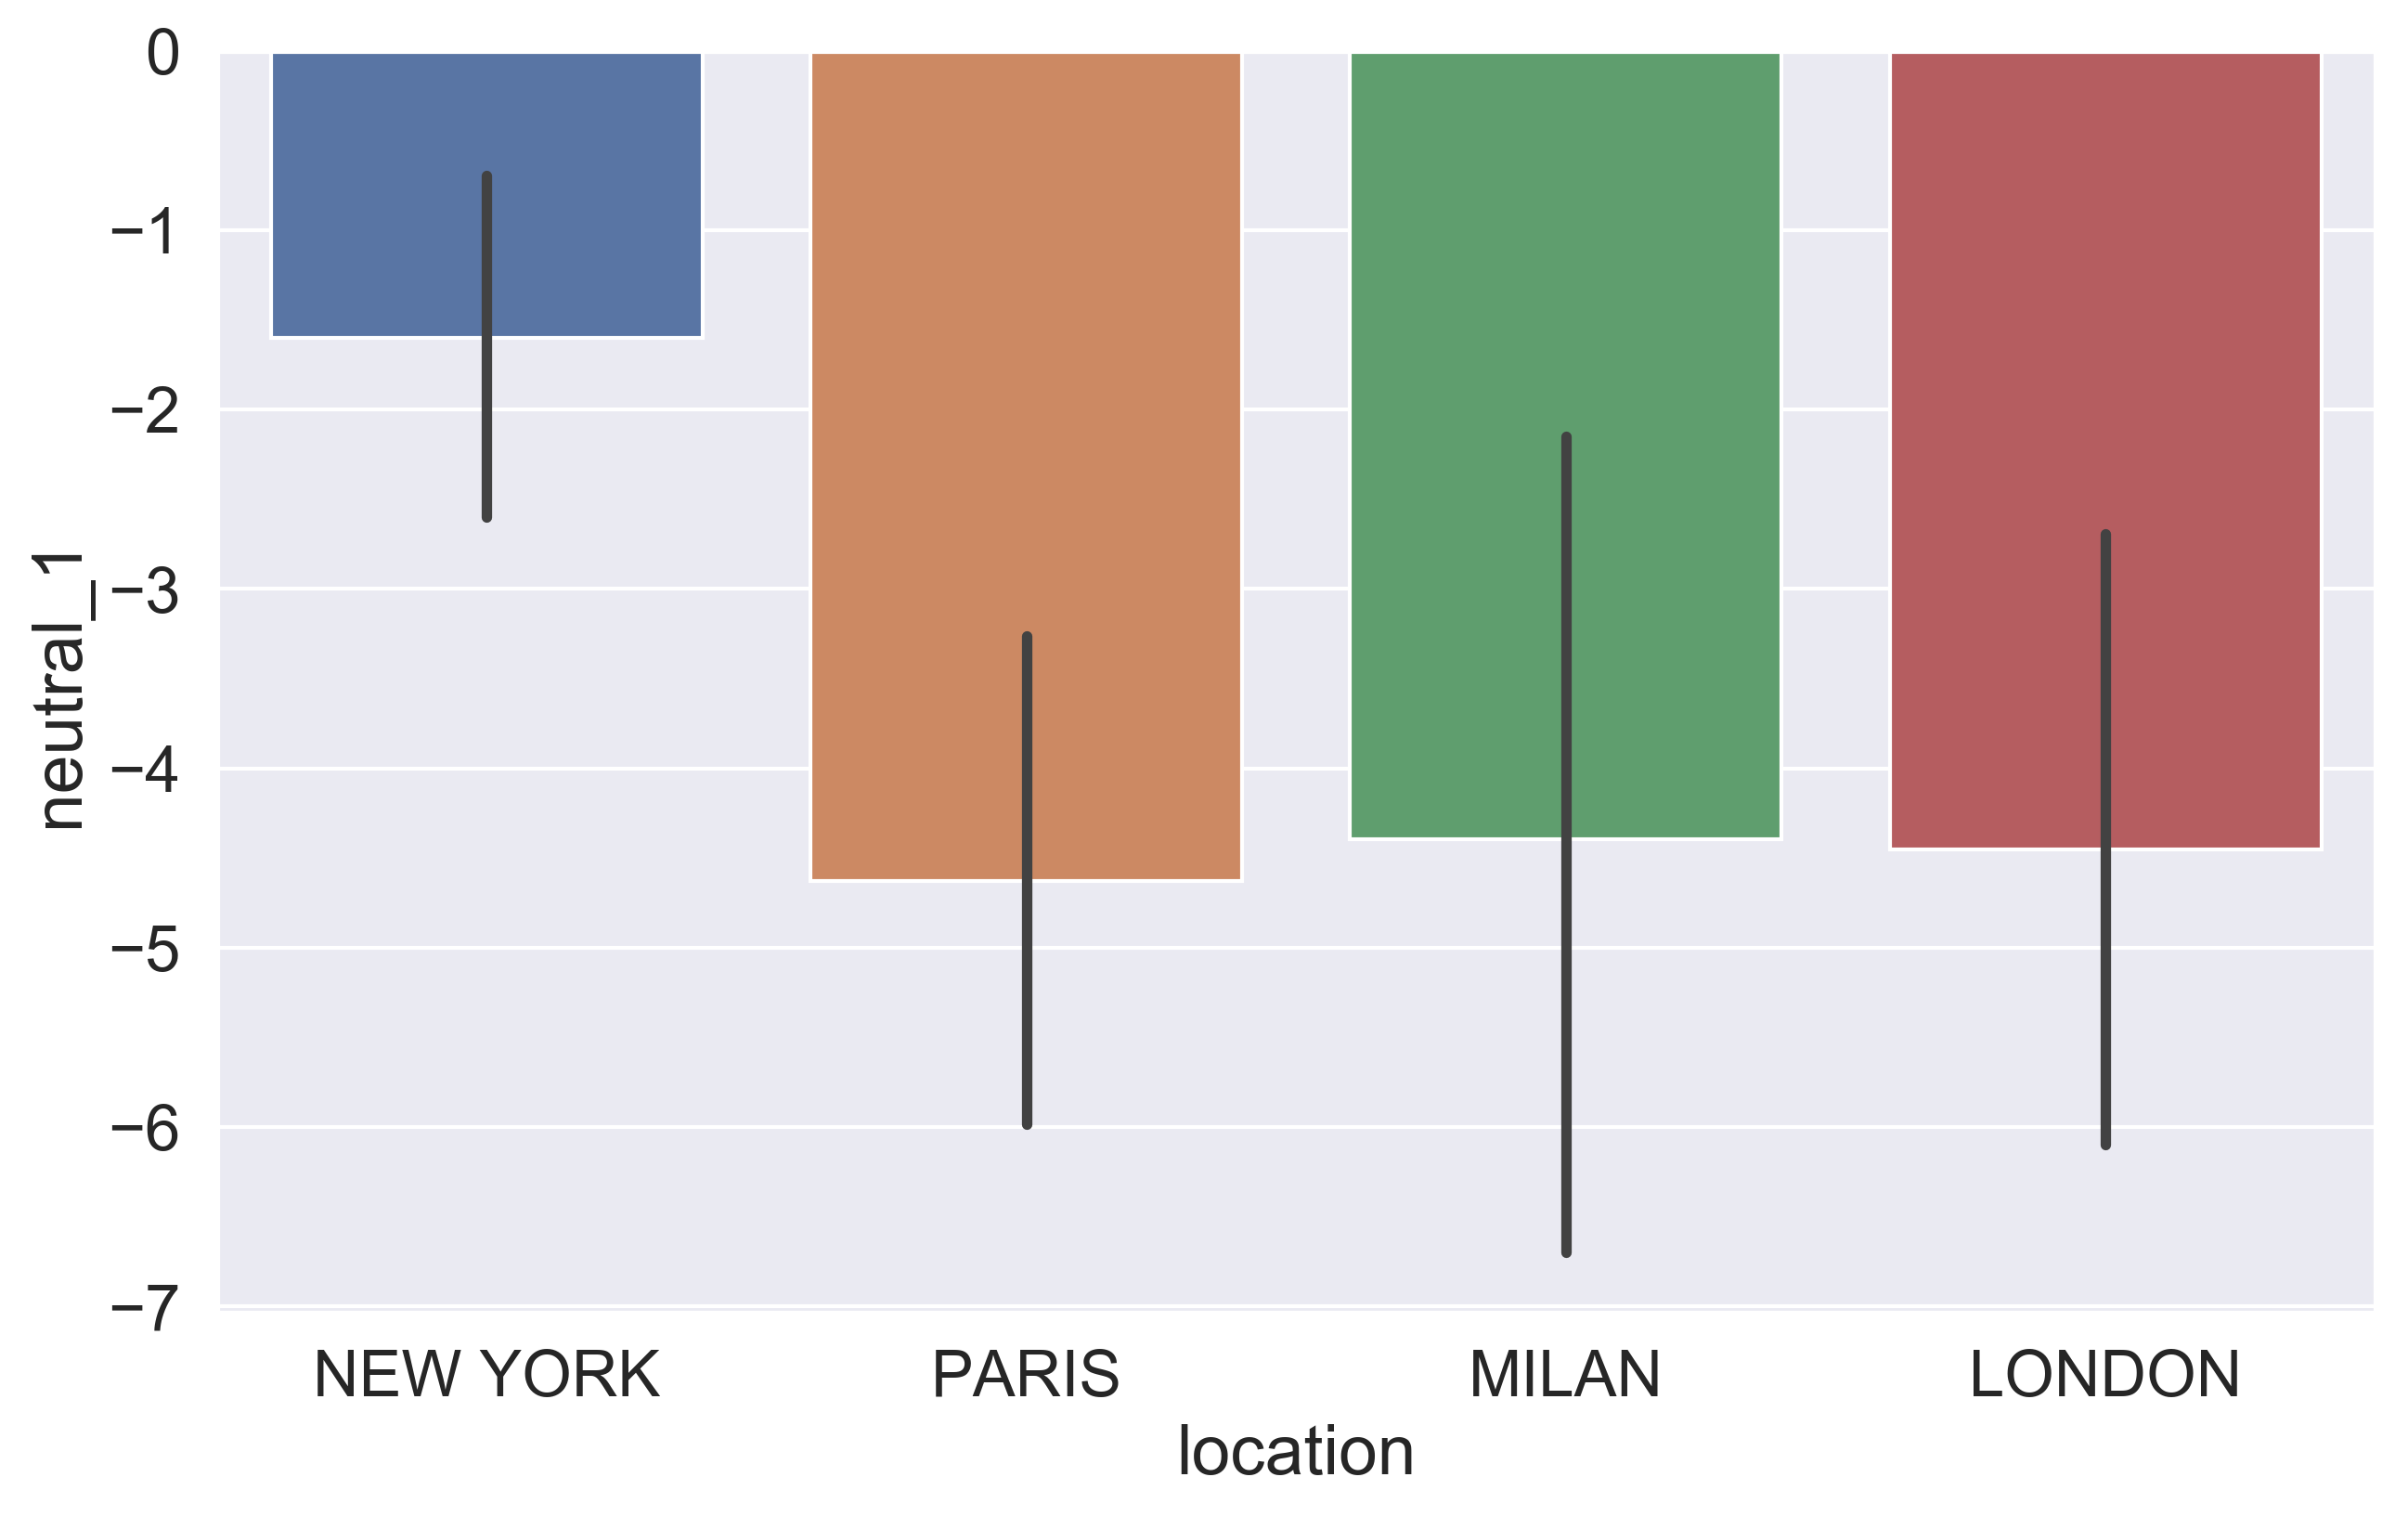

In [29]:
sns.set_style('ticks')
sent_by_location = df.groupby(['location']).mean()
plt.figure(figsize=(10,6),dpi = 300)
sns.set(font_scale=1.5)
_ = sns.barplot(data= df,x = 'location',y = 'neutral_1')
_.figure.savefig('polarity_by_location.png')

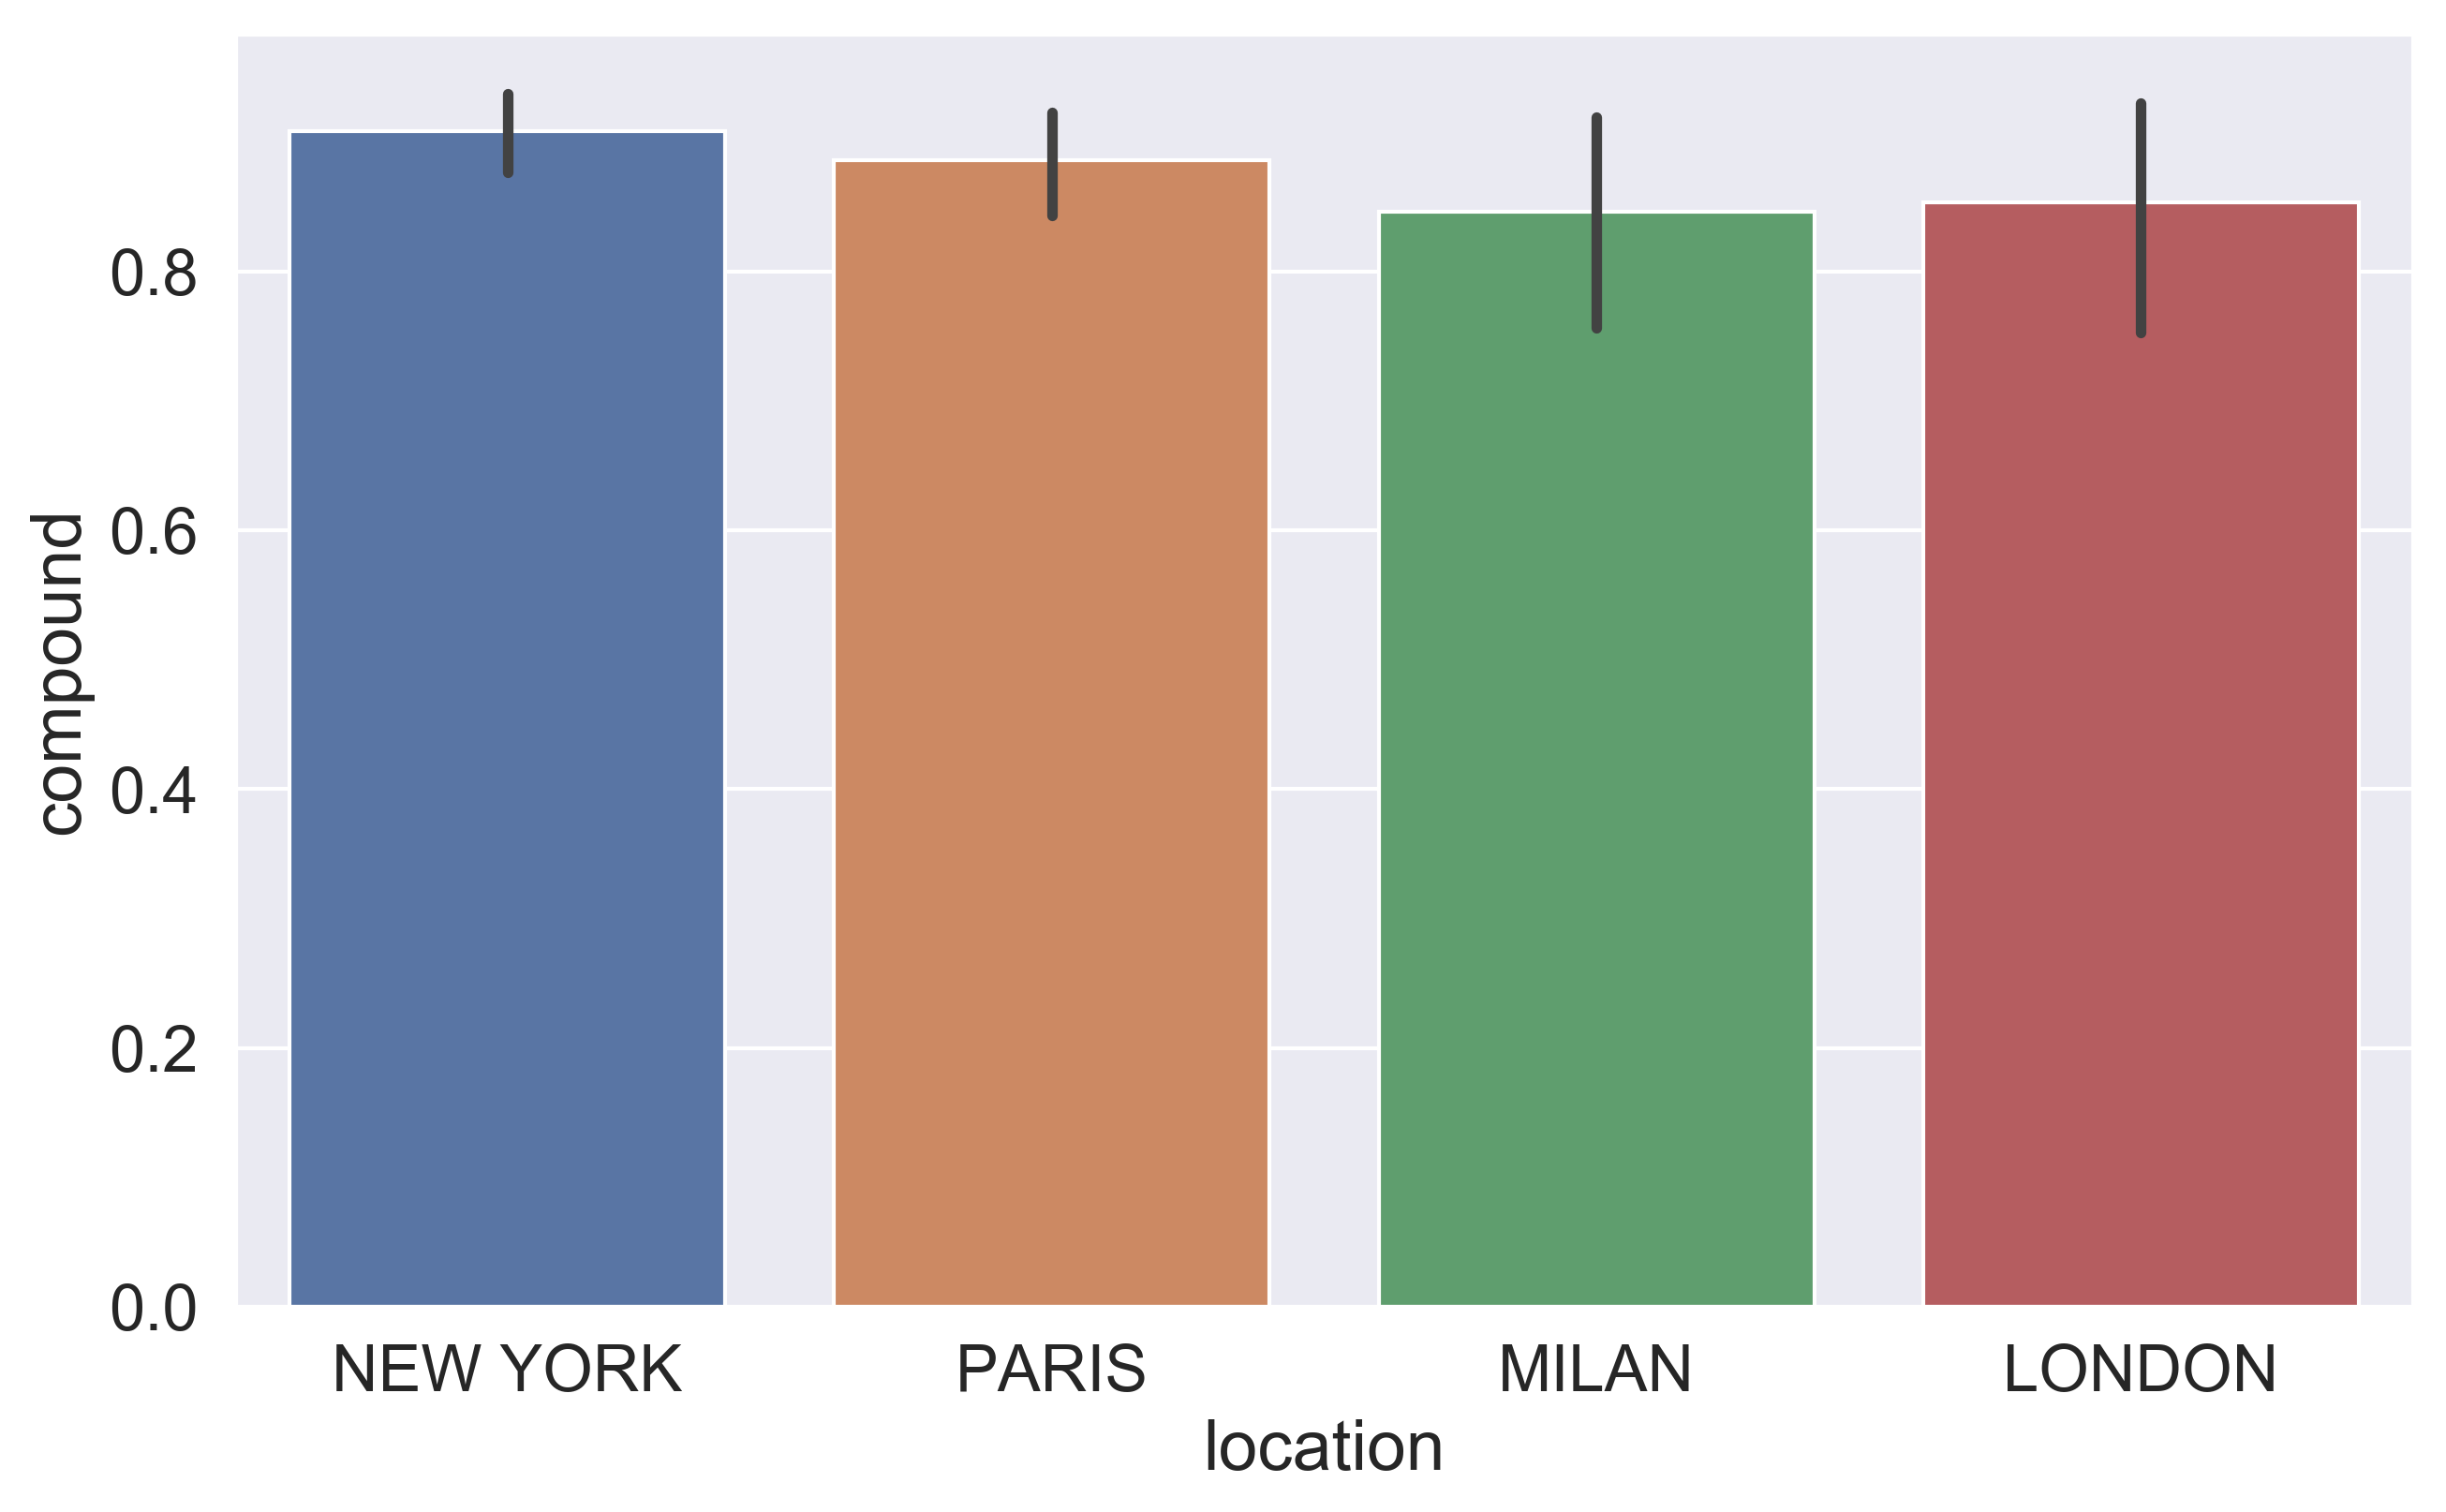

In [30]:
sns.set_style('ticks')
sent_by_location = df.groupby(['location']).mean()
plt.figure(figsize=(10,6),dpi = 300)
sns.set(font_scale=1.5)
_ = sns.barplot(data= df,x = 'location',y = 'compound')
_.figure.savefig('polarity_by_location.png')

## From the graph we could find that NY is the best in general speaking!

In [31]:
sent_by_location


,positive_1,negative_1,neutral_1,positive_2,negative_2,neutral_2,compound,polarity,subjectivity
location,,,,,,,,,
LONDON,18.677419,23.129032,-4.451613,0.101484,0.029726,0.868855,0.853624,0.135992,0.496022
MILAN,19.207547,23.603774,-4.396226,0.106019,0.031792,0.862113,0.846585,0.134584,0.459840
NEW YORK,18.483254,20.086124,-1.602871,0.112818,0.021287,0.865900,0.908633,0.151715,0.466952
PARIS,19.190909,23.818182,-4.627273,0.103264,0.027318,0.869436,0.886355,0.134372,0.466143


In [32]:
sent_by_brand = df.groupby(['brand']).mean()
sent_by_brand_count = df.groupby(['brand']).count()
sent_by_brand['number_reviews'] = sent_by_brand_count['author of review']

In [33]:
sent_by_brand.sort_values('number_reviews').head()

,positive_1,negative_1,neutral_1,positive_2,negative_2,neutral_2,compound,polarity,subjectivity,number_reviews
brand,,,,,,,,,,
1205,10,17,-7,0.086,0.024,0.890,0.8831,0.064933,0.541516,1
Osklen,22,21,1,0.173,0.038,0.789,0.9950,0.097396,0.417329,1
Oscar de la Renta,34,29,5,0.097,0.020,0.883,0.9876,0.127586,0.426100,1
Orley,15,19,-4,0.099,0.025,0.876,0.9767,0.099147,0.456887,1
Orla Kiely,14,19,-5,0.123,0.057,0.820,0.9565,0.072115,0.459402,1


### It seems that every brand got only one review, thus we tend to find insightful knowledges based on location.
### For simplisity, we tend to use polarity for our sentiment analysis.


In [84]:
df_ana = df[['time','location','polarity','subjectivity']]
df_location_reform = pd.pivot_table(df_ana,values=['polarity'],columns=['location'], index=['time'],fill_value=0 )
df_location_reform.head()

polarity                      
location     LONDON MILAN  NEW YORK PARIS
time                                     
2015-09-08      0.0   0.0  0.120751   0.0
2015-09-09      0.0   0.0  0.138341   0.0
2015-09-10      0.0   0.0  0.155668   0.0
2015-09-11      0.0   0.0  0.167124   0.0
2015-09-12      0.0   0.0  0.159422   0.0

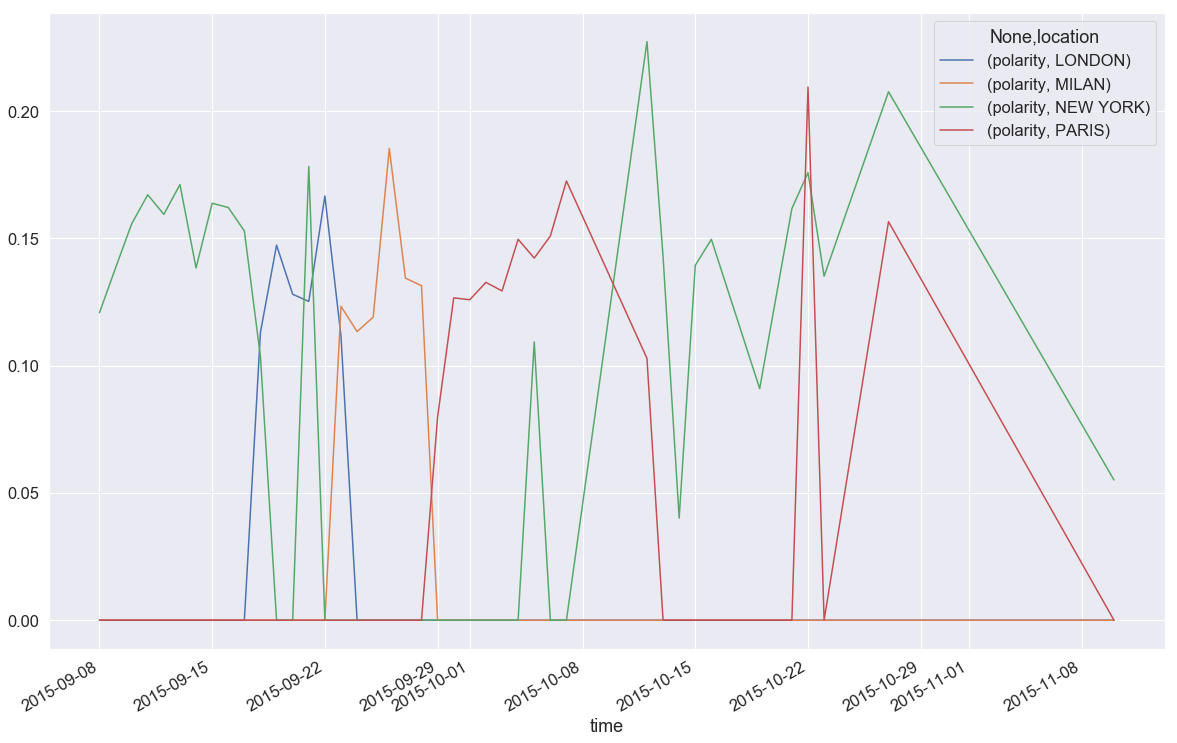

In [85]:
df_location_reform.plot(figsize=(20,13),)

In [87]:
df_location_reform['london']= df_location_reform.iloc[:,0].rolling(window=3,center=False).mean()
df_location_reform['milan']=df_location_reform.iloc[:,1].rolling(window=3,center=False).mean()
df_location_reform['new_york']=df_location_reform.iloc[:,2].rolling(window=3,center=False).mean()
df_location_reform['paris']=df_location_reform.iloc[:,3].rolling(window=3,center=False).mean()

In [94]:
df_location_reform['time'] = df_location_reform.index 

polarity                                  london         milan  \
location      LONDON     MILAN  NEW YORK     PARIS                           
time                                                                         
2015-09-08  0.000000  0.000000  0.120751  0.000000       NaN           NaN   
2015-09-09  0.000000  0.000000  0.138341  0.000000       NaN           NaN   
2015-09-10  0.000000  0.000000  0.155668  0.000000  0.000000  0.000000e+00   
2015-09-11  0.000000  0.000000  0.167124  0.000000  0.000000  0.000000e+00   
2015-09-12  0.000000  0.000000  0.159422  0.000000  0.000000  0.000000e+00   
2015-09-13  0.000000  0.000000  0.171119  0.000000  0.000000  0.000000e+00   
2015-09-14  0.000000  0.000000  0.138382  0.000000  0.000000  0.000000e+00   
2015-09-15  0.000000  0.000000  0.163787  0.000000  0.000000  0.000000e+00   
2015-09-16  0.000000  0.000000  0.162115  0.000000  0.000000  0.000000e+00   
2015-09-17  0.000000  0.000000  0.152916  0.000000  0.000000  0.000000e+00   
2015-09-18  0.113157  0.000000  0.103381  0.000000  0.037719  0.000000e+00   
2015-09-19  0.147328  0.000000  0.000000  0.000000  0.086828  0.000000e+00   
2015-09-20  0.128039  0.000000  0.000000  0.000000  0.129508  0.000000e+00   
2015-09-21  0.125219  0.000000  0.178247  0.000000  0.133529  0.000000e+00   
2015-09-22  0.166642  0.000000  0.000000  0.000000  0.139967  0.000000e+00   
2015-09-23  0.111557  0.123309  0.000000  0.000000  0.134473  4.110297e-02   
2015-09-24  0.000000  0.113381  0.000000  0.000000  0.092733  7.889657e-02   
2015-09-25  0.000000  0.119032  0.000000  0.000000  0.037186  1.185740e-01   
2015-09-26  0.000000  0.185305  0.000000  0.000000  0.000000  1.392395e-01   
2015-09-27  0.000000  0.134383  0.000000  0.000000  0.000000  1.462403e-01   
2015-09-28  0.000000  0.131405  0.000000  0.000000  0.000000  1.503646e-01   
2015-09-29  0.000000  0.000000  0.000000  0.079846  0.000000  8.859615e-02   
2015-09-30  0.000000  0.000000  0.000000  0.126614  0.000000  4.380174e-02   
2015-10-01  0.000000  0.000000  0.000000  0.125887  0.000000  2.775558e-17   
2015-10-02  0.000000  0.000000  0.000000  0.132701  0.000000  2.775558e-17   
2015-10-03  0.000000  0.000000  0.000000  0.129353  0.000000  2.775558e-17   
2015-10-04  0.000000  0.000000  0.000000  0.149629  0.000000  2.775558e-17   
2015-10-05  0.000000  0.000000  0.109314  0.142241  0.000000  2.775558e-17   
2015-10-06  0.000000  0.000000  0.000000  0.150904  0.000000  2.775558e-17   
2015-10-07  0.000000  0.000000  0.000000  0.172538  0.000000  2.775558e-17   
2015-10-12  0.000000  0.000000  0.227301  0.102886  0.000000  2.775558e-17   
2015-10-13  0.000000  0.000000  0.142854  0.000000  0.000000  2.775558e-17   
2015-10-14  0.000000  0.000000  0.040063  0.000000  0.000000  2.775558e-17   
2015-10-15  0.000000  0.000000  0.139404  0.000000  0.000000  2.775558e-17   
2015-10-16  0.000000  0.000000  0.149616  0.000000  0.000000  2.775558e-17   
2015-10-19  0.000000  0.000000  0.090965  0.000000  0.000000  2.775558e-17   
2015-10-21  0.000000  0.000000  0.161726  0.000000  0.000000  2.775558e-17   
2015-10-22  0.000000  0.000000  0.175799  0.209421  0.000000  2.775558e-17   
2015-10-23  0.000000  0.000000  0.135107  0.000000  0.000000  2.775558e-17   
2015-10-27  0.000000  0.000000  0.207600  0.156548  0.000000  2.775558e-17   
2015-11-10  0.000000  0.000000  0.055098  0.000000  0.000000  2.775558e-17   

            new_york         paris       time  
location                                       
time                                           
2015-09-08       NaN           NaN 2015-09-08  
2015-09-09       NaN           NaN 2015-09-09  
2015-09-10  0.138254  0.000000e+00 2015-09-10  
2015-09-11  0.153711  0.000000e+00 2015-09-11  
2015-09-12  0.160738  0.000000e+00 2015-09-12  
2015-09-13  0.165888  0.000000e+00 2015-09-13  
2015-09-14  0.156308  0.000000e+00 2015-09-14  
2015-09-15  0.157763  0.000000e+00 2015-09-15  
2015-09-16  0.154761  0.000000e+00 2015-09-16  
201

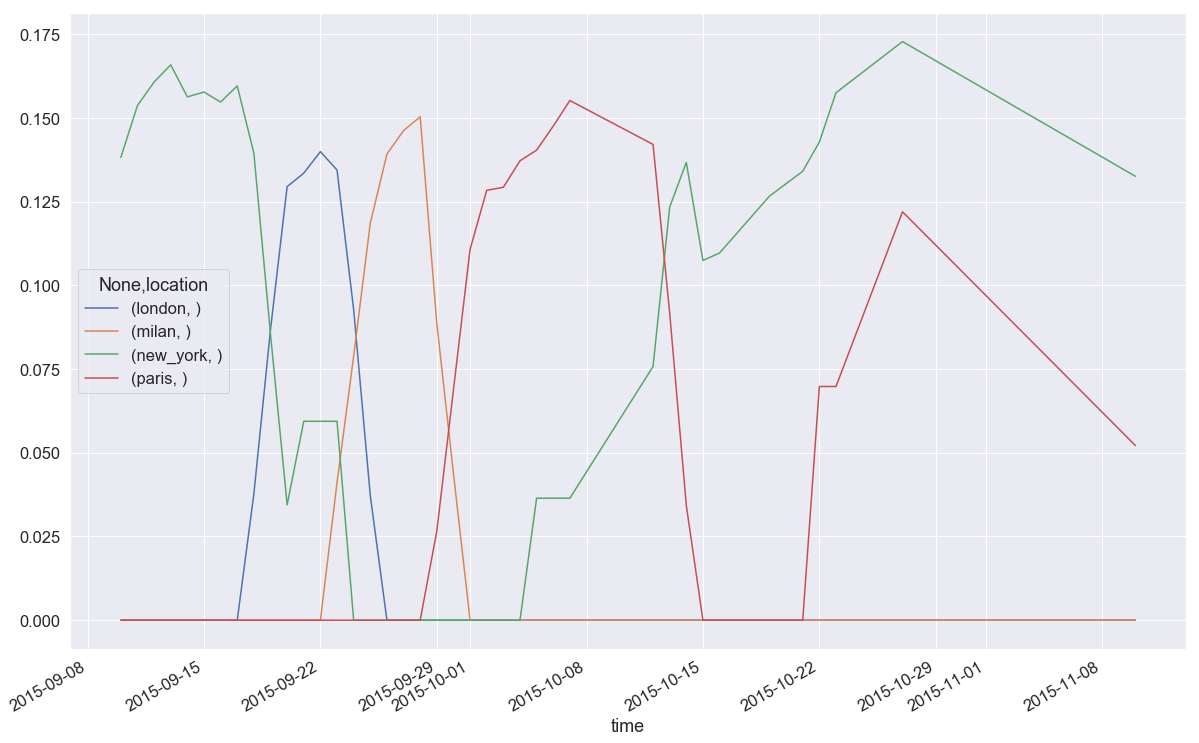

In [95]:
df_location_reform.plot(x='time', y=['london','milan','new_york','paris'],figsize=(20,13))
plt.show()